In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [4]:
# a. Check for missing values
missing_values = df.isnull().sum()


In [5]:
# b. Normalize or standardize the data if necessary
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# c. Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [7]:
missing_values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [8]:
# e. Train a Support Vector Machine Classifier on the training data
# Using 'rbf' kernel as it performs well for non-linear classification

svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier.fit(X_train, y_train)

SVC()

In [9]:
# Predicting on the test set
y_pred = svm_classifier.predict(X_test)

In [10]:
# f. Evaluate the classifier using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

In [11]:
accuracy, precision, recall, f1

(1.0, 1.0, 1.0, 1.0)

In [12]:
from sklearn.decomposition import PCA

In [13]:
# Reduce the dataset to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [14]:
# Split the PCA-transformed data into training and test sets again
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [15]:
# Retrain the SVM on the PCA-transformed data
svm_classifier_pca = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_classifier_pca.fit(X_train_pca, y_train)

SVC()

In [16]:
# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [17]:
# Predict the SVM decision boundary
Z = svm_classifier_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

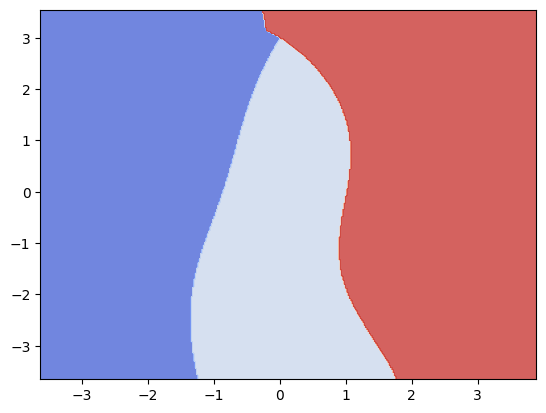

In [18]:
# g. Visualize the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)

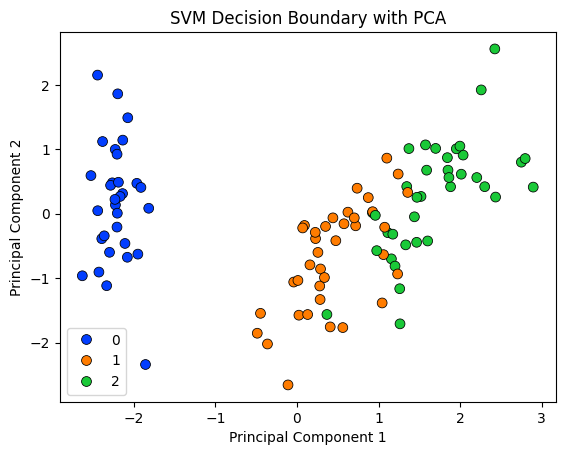

In [19]:
# h. Plot the data points color-coded by their class labels
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette='bright', s=50, edgecolor='k')
plt.title('SVM Decision Boundary with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()